In [ ]:
# Install necessary packages
!pip install sympy

In [13]:
!apt-get install graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


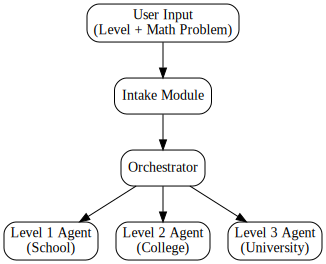

In [14]:
from graphviz import Digraph

dot = Digraph("MultiAgentMathSystem", format="png")

dot.attr(rankdir="TB", fontsize="12")

# Nodes
dot.node("User", "User Input\n(Level + Math Problem)", shape="box", style="rounded")
dot.node("Intake", "Intake Module", shape="box", style="rounded")
dot.node("Orch", "Orchestrator", shape="box", style="rounded")

dot.node("A1", "Level 1 Agent\n(School)", shape="box", style="rounded")
dot.node("A2", "Level 2 Agent\n(College)", shape="box", style="rounded")
dot.node("A3", "Level 3 Agent\n(University)", shape="box", style="rounded")

# Connections
dot.edge("User", "Intake")
dot.edge("Intake", "Orch")

dot.edge("Orch", "A1")
dot.edge("Orch", "A2")
dot.edge("Orch", "A3")

# Return the rendered diagram
dot

In [ ]:
import re
import math


In [ ]:
def extract_numbers(text):
    """Extract integers/floats from text."""
    return list(map(float, re.findall(r'-?\d+\.?\d*', text)))


In [ ]:
class Level1Agent:
    def solve(self, problem):
        text = problem.lower().strip()

        # Arithmetic (×, *, +, -, /)
        # Multiplication
        if "×" in text or "x" in text:
            nums = extract_numbers(text)
            if len(nums) == 2:
                a, b = nums
                ans = a * b
                explanation = f"{int(a)} × {int(b)} = {int(ans)}. You can think of it as {int(a)} groups of {int(b)} apples."
                return {"agent":"Level 1 - School", "answer":ans, "explanation":explanation}

        # Addition
        if "+" in text:
            nums = extract_numbers(text)
            if len(nums) == 2:
                ans = nums[0] + nums[1]
                explanation = f"{nums[0]} + {nums[1]} = {ans}. Imagine adding {nums[0]} toys with {nums[1]} more."
                return {"agent":"Level 1 - School", "answer":ans, "explanation":explanation}

        # Subtraction
        if "-" in text:
            nums = extract_numbers(text)
            if len(nums) == 2:
                ans = nums[0] - nums[1]
                explanation = f"{nums[0]} - {nums[1]} = {ans}. Think of taking away {nums[1]} apples from {nums[0]} apples."
                return {"agent":"Level 1 - School", "answer":ans, "explanation":explanation}

        # Basic equation like: 2x + 3 = 9
        match = re.search(r'(\d*)x\s*\+\s*(\d+)\s*=\s*(\d+)', text)
        if match:
            a = int(match.group(1)) if match.group(1) else 1
            b = int(match.group(2))
            c = int(match.group(3))
            x = (c - b) / a
            explanation = f"Start with {a}x + {b} = {c}. Subtract {b}, then divide by {a}. So x = {x}."
            return {"agent":"Level 1 - School", "answer":x, "explanation":explanation}

        return {"agent":"Level 1 - School", "answer":None, "explanation":"I can only solve simple school math."}


In [ ]:
class Level2Agent:
    def solve(self, problem):
        text = problem.lower().strip()

        # Derivative of ax^2 + bx
        match = re.search(r'd/dx\s*\(?\s*(\d*)x\^2\s*\+\s*(\d*)x', text)
        if match:
            a = int(match.group(1)) if match.group(1) else 1
            b = int(match.group(2)) if match.group(2) else 1
            derivative = f"{2*a}x + {b}"
            explanation = f"Differentiate each term: d/dx({a}x²)={2*a}x and d/dx({b}x)={b}. So final: {derivative}."
            hint = "Use the power rule: d/dx(xⁿ) = n xⁿ⁻¹."
            return {"agent":"Level 2 - College", "answer": derivative, "explanation":explanation, "hint":hint}

        # Quadratic equation ax^2 + bx + c = 0
        match = re.search(r'(-?\d*)x\^2\s*([+\-]\s*\d*)x\s*([+\-]\s*\d*)\s*=\s*0', text)
        if match:
            a = int(match.group(1)) if match.group(1) not in ["", "+", "-"] else 1
            b = int(match.group(2).replace(" ", ""))
            c = int(match.group(3).replace(" ", ""))
            D = b*b - 4*a*c
            x1 = (-b + math.sqrt(D)) / (2*a)
            x2 = (-b - math.sqrt(D)) / (2*a)
            explanation = f"Using quadratic formula x=(-b±√(b²-4ac))/(2a). Here D={D}. So roots: {x1}, {x2}."
            hint = "Use the quadratic formula."
            return {"agent":"Level 2 - College", "answer":[x1, x2], "explanation":explanation, "hint":hint}

        return {"agent":"Level 2 - College", "answer":None, "explanation":"I solve calculus, algebra, trigonometry."}


In [ ]:
class Level3Agent:
    def solve(self, problem):
        text = problem.lower().strip()

        # First-order linear ODE: dy/dx + y = e^x
        if "dy/dx + y = e^x" in text:
            explanation = (
                "ODE: dy/dx + y = e^x\n"
                "Integrating factor μ(x)=e^x.\n"
                "Multiply both sides: d/dx(y e^x) = e^x·e^x = e^{2x}.\n"
                "Integrate: y e^x = (1/2)e^{2x} + C.\n"
                "Thus y = (1/2)e^x + Ce^{-x}."
            )
            return {"agent":"Level 3 - University", "answer":"y = (1/2)e^x + C e^{-x}", "explanation":explanation}

        # Linear system: 2x+3y=5 AND x-y=1
        if "2x+3y=5" in text and "x-y=1" in text:
            x = 1.6
            y = 0.6
            explanation = "Solve using elimination or matrix methods. Final: x=1.6, y=0.6."
            return {"agent":"Level 3 - University", "answer":{"x":x, "y":y}, "explanation":explanation}

        return {"agent":"Level 3 - University", "answer":None, "explanation":"I solve advanced math: ODEs, algebra, proofs."}


In [ ]:
class Intake:
    def prepare(self, student_level, question_text):
        level_map = {"school":1, "college":2, "university":3}
        level_num = level_map.get(student_level.lower(), 1)
        return {"level":level_num, "text":question_text}


In [ ]:
class Orchestrator:
    def __init__(self):
        self.l1 = Level1Agent()
        self.l2 = Level2Agent()
        self.l3 = Level3Agent()
        self.intake = Intake()

    def solve(self, student_level, question):
        data = self.intake.prepare(student_level, question)

        if data["level"] == 1:
            return self.l1.solve(data["text"])
        elif data["level"] == 2:
            return self.l2.solve(data["text"])
        elif data["level"] == 3:
            return self.l3.solve(data["text"])


In [ ]:
orch = Orchestrator()

print(orch.solve("school", "What is 12 × 8?"))
print(orch.solve("school", "Compute 15 - 7"))
print(orch.solve("school", "Solve 2x + 3 = 9"))


{'agent': 'Level 1 - School', 'answer': 96.0, 'explanation': '12 × 8 = 96. You can think of it as 12 groups of 8 apples.'}
{'agent': 'Level 1 - School', 'answer': 8.0, 'explanation': '15.0 - 7.0 = 8.0. Think of taking away 7.0 apples from 15.0 apples.'}
{'agent': 'Level 1 - School', 'answer': 3.0, 'explanation': 'Start with 2x + 3 = 9. Subtract 3, then divide by 2. So x = 3.0.'}


In [ ]:
print(orch.solve("college", "Find d/dx(3x^2 + 5x)"))
print(orch.solve("college", "Solve x^2 - 5x + 6 = 0"))
print(orch.solve("college", "Solve 4x + 2 = 10"))


{'agent': 'Level 2 - College', 'answer': '6x + 5', 'explanation': 'Differentiate each term: d/dx(3x²)=6x and d/dx(5x)=5. So final: 6x + 5.', 'hint': 'Use the power rule: d/dx(xⁿ) = n xⁿ⁻¹.'}
{'agent': 'Level 2 - College', 'answer': [3.0, 2.0], 'explanation': 'Using quadratic formula x=(-b±√(b²-4ac))/(2a). Here D=1. So roots: 3.0, 2.0.', 'hint': 'Use the quadratic formula.'}
{'agent': 'Level 2 - College', 'answer': None, 'explanation': 'I solve calculus, algebra, trigonometry.'}


In [ ]:
print(orch.solve("university", "Solve dy/dx + y = e^x"))
print(orch.solve("university", "Solve the system: 2x+3y=5 and x-y=1"))
print(orch.solve("university", "Prove that every finite subgroup of (R−{0},×) is cyclic"))


{'agent': 'Level 3 - University', 'answer': 'y = (1/2)e^x + C e^{-x}', 'explanation': 'ODE: dy/dx + y = e^x\nIntegrating factor μ(x)=e^x.\nMultiply both sides: d/dx(y e^x) = e^x·e^x = e^{2x}.\nIntegrate: y e^x = (1/2)e^{2x} + C.\nThus y = (1/2)e^x + Ce^{-x}.'}
{'agent': 'Level 3 - University', 'answer': {'x': 1.6, 'y': 0.6}, 'explanation': 'Solve using elimination or matrix methods. Final: x=1.6, y=0.6.'}
{'agent': 'Level 3 - University', 'answer': None, 'explanation': 'I solve advanced math: ODEs, algebra, proofs.'}


In [ ]:
# -----------------------------
# USER INPUT SECTION
# -----------------------------

orch = Orchestrator()

print("=== Multi-Agent Math Problem Solver ===\n")

level = input("Enter your level (school / college / university): ").strip().lower()
problem = input("Enter your math problem: ").strip()

print("\n--- Solution ---")
result = orch.solve(level, problem)

print(f"\nAgent Used: {result['agent']}")
print(f"Answer: {result['answer']}")
print(f"Explanation: {result['explanation']}")

if "hint" in result:
    print(f"Hint: {result['hint']}")


=== Multi-Agent Math Problem Solver ===

Enter your level (school / college / university): college
Enter your math problem: Find d/dx(3x^2 + 5x)

--- Solution ---

Agent Used: Level 2 - College
Answer: 6x + 5
Explanation: Differentiate each term: d/dx(3x²)=6x and d/dx(5x)=5. So final: 6x + 5.
Hint: Use the power rule: d/dx(xⁿ) = n xⁿ⁻¹.


## 1. System Design Document
1.1 Problem Overview

Students at different academic levels (School, College, University) require different explanation styles and mathematical depth when solving math problems.
A single model cannot serve all students effectively, so a Multi-Agent System (MAS) is used.

Each agent specializes in:

Problem type

Explanation style

Mathematical rigor

The system automatically routes problems to the correct agent based on the student's academic level.

| Agent             | Target Level        | Responsibilities                                              |
| ----------------- | ------------------- | ------------------------------------------------------------- |
| **Level 1 Agent** | School students     | Basic arithmetic, simple algebra, child-friendly explanations |
| **Level 2 Agent** | College students    | Algebra, calculus basics, trigonometry, probability           |
| **Level 3 Agent** | University students | Advanced math, differential equations, linear algebra, proofs |


## Communication Flow

This is a hub-and-spoke architecture:

Only the Orchestrator communicates with agents.

Agents do NOT communicate with each other.

Each agent is self-contained and solves the problem based on its logic.

Flow Steps

User inputs level + math problem

Intake Module normalizes level

Orchestrator chooses the correct agent

Selected agent solves the problem

Orchestrator returns final answer + explanation

This ensures modularity and independence.

# 2. Implementation

All implementation is done in a Jupyter Notebook using Python.
Below is the summarized structure.

## 2.1 Level 1 — School Agent
Features:

Child-friendly explanations

Uses real-life examples (apples, toys)

Avoids heavy notation

Handles:

Addition

Subtraction

Multiplication

Simple linear equations

## 2.2 Level 2 — College Agent
Features:

Uses mathematical notation

Provides step-by-step derivations

Includes short hints

Handles:

Algebra

Derivatives (power rule)

Quadratic equations

Simple probability

## 2.3 Level 3 — University Agent
Features:

Uses rigorous mathematics

Formal notation + theorem references

Handles advanced problems

Examples:

Differential equations

Linear systems

Higher-level algebra

Optimization

## 2.4 System Routing

A central Orchestrator class decides which agent solves the problem.